# Maximum Liklehood Estimation

**<font color=red> Mr Fugu Data Science</font>**

# (◕‿◕✿)

[Youtube](https://www.youtube.com/channel/UCbni-TDI-Ub8VlGaP8HLTNw/) | [Github](https://github.com/MrFuguDataScience)


**`Maximum Likelihood Estimation`**: allows us to estimate our "*unknown*" parameters for a given probability distribution. Think of it like this: we are trying to find the likelihood "*probability*" of generating this dataset.
+ The parameters are found where they maximize the likelihood of generating our model.

+ We are trying to figure out what model best describes our data. Having domain knowledge can help, in these circustances. 

`Desireable Effects`: (if you have a large sample size)
+ As the sample size increases, we reach an unbiased variance estimator
+ The ability to generate a normal distribution and confidence intervals can be used with large enough samples
+ The ability to form hypothesis testing

`Drawbacks`:
+ If you have small sample size there will be bias
+ Can be a computational hog

`-------------------------------`

`Each probability distribution will have unique parameters. As the parameters change, a different probability distribution is generated.`

+ The parameters for each model will fall into a family of distributions based on the parameters you have. The parameters here will be ($\mu,\sigma$)

For example you may have a `normal distribution`, but the mean ($\mu$) and standard deviation ($\sigma$) are not the same from one model to the other. 
+ Therefore, you may have a family of normal distributions with varying parameters.

# Plot showing different normals and explain as family of functions

+ These two plots reflect the parameters of a `Normal Distribution` you may want to estimate. If this were a different problem you would evaluate other parameters and which may not be [$\mu,\sigma$]

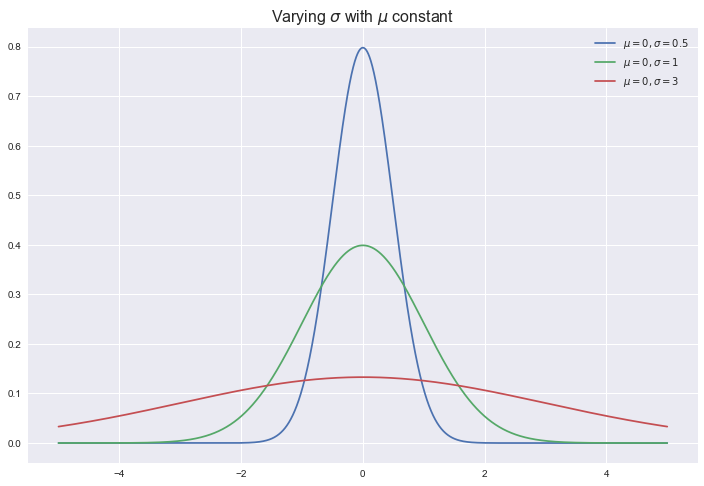

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


plt.style.use('seaborn') # pretty matplotlib plots
plt.rcParams['figure.figsize'] = (12, 8)


x = np.linspace(-5, 5, 5000)
mu = [0,0,0]
sigma = [.5,1,3]

y_=[]
for i in range(len(sigma)):
 
    y = (1 / (np.sqrt(2 * np.pi * np.power(sigma[i], 2)))) * \
    (np.power(np.e, -(np.power((x - mu[i]), 2) / (2 * np.power(sigma[i], 2)))))
     
    y_.append(y)

labels=[('$\mu=0,\sigma=0.5$'),('$\mu=0,\sigma=1$'),('$\mu=0,\sigma=3$')]

for i in range(len(y_)):
    plt.plot(x,y_[i],label=labels[i])
    plt.title('Varying $\sigma$ with $\mu$ constant', size=16)
    plt.legend();

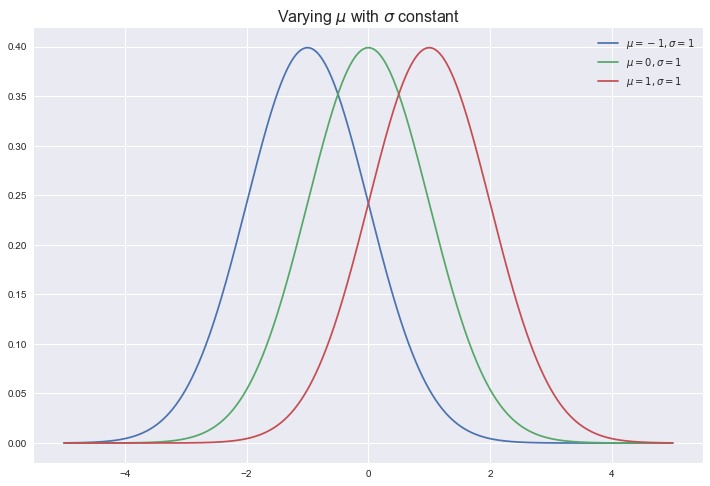

In [2]:
x = np.linspace(-5, 5, 5000)
mu_1=[-1,0,1]
sigma_1=[1,1,1]
y_1=[]
for i in range(len(sigma)):
    
    y_01= (1 / (np.sqrt(2 * np.pi * np.power(sigma_1[i], 2)))) * \
    (np.power(np.e, -(np.power((x - mu_1[i]), 2) / (2 * np.power(sigma_1[i], 2)))))
    y_1.append(y_01)
    
labels_1=[('$\mu=-1,\sigma=1$'),('$\mu=0,\sigma=1$'),('$\mu=1,\sigma=1$')]    
for i in range(len(y_)): 
    plt.plot(x,y_1[i],label=labels_1[i])
    plt.legend(); 
    plt.title('Varying $\mu$ with $\sigma$ constant',size=16)

`---------------------------`

In the real world we are given some data that we observed, and need to find some model of interest that will best describe our data using a `PDF` that will most likely represent our data. 

+ Realistically, we do not always have the option of transforming our data (*log,reciprocal,square root, etc*) to save the day. 

`---------------------------`

**Instead we have**: $L(\theta ; x_i) = f(x ; \theta)$

$L(\theta ; x_i)$ : `This means that we have the likelihood of some true parameter theta given the observed data X`

`well what is the right side then?`: it is our `PDF` and there is a distinction

$f(x ; \theta)$ : is a function of data given a particular set of parameters

<font color=red>I am using the semicolon</font> **to denote parameters with respect to X instead of confusing conditional probability at this point, which would have the vertical bars**

# Math of MLE: 

*Nasty Truth*:
+ **First**, there doesn't have to be a unique value of the `MLE`
    + **Second**, there may not be a value that exists for the `MLE`
    
`Hint: because you need to think about concavity`, this is a problem if we are dealing with machine learning algorithms and a bit topic. 

`-----------------`

**Super Fun Happy Times**, wait what?

# ʕ•ᴥ•ʔ

`MaTh TiMe Y'aLL`:

<font size=4>$L(\theta ; x_i) = f(x ; \theta)$</font>

<font size=4>$f(x ; \theta)=\prod f(X | \theta) =$</font>

<font size=4>$f(x_1,x_2,x_3...x_n | \theta) = $</font>

<font size=4>$f(x_1 | \theta) *  $ $f(x_1 | \theta) *  $ $f(x_2 | \theta) *...  $ $f(x_n | \theta) $ </font>

But, now the trickery  `¯\_(ツ)_/¯` :

We will decide to do the `Log` because, it will get rid of our multiplcations and simply everything. Also, since the log is strickly increasing it shouldn't effect our function. 

+ We will need to find the Max/Min, hince we will need the `first derivative` with respect to $\theta$ and equate to zero. 

<font size=4>$log(L(\theta ; x_i)) = log[f(\theta | x_1) *  f( \theta | x_1 ) *  f(\theta | x_2) *...  f( \theta | (x_n )]$</font>

<font size=4>$= log(f(\theta | x_1)) +  log(f(\theta | x_1)) +  log(f(\theta | x_2)) +...  log(f( \theta | x_n ))$</font>

<font size=4>$= \sum_{i=1}^n log(f( \theta | x))$</font>

**`Derivative Time`**

`First Derivative`:<font size =5> $\frac{\partial ln(L(\theta | x))}{\partial \theta_i }=0$</font>


`Second Derivative`: <font size=5>$\frac{\partial^2 ln(L(\theta | x))}{\partial \theta_i^2} <0$</font>

*At this point if you have a suspected distribution, you would replace with your distribution function*. There are times when:

`Real World`: Either the data are highly paramertized , non-convex (*are a few reasons*) and you will need to use optimazation techinues to attempt solving these problems with approximation methods.

+ `Examples`: *Newton’s method, Fisher scoring, various conjugate gradient-based approaches, steepest descent, Nelder-Mead type (simplex) approaches, BFGS* and a wide variety of other techniques (from: https://www.analyticsvidhya.com/blog/2018/07/introductory-guide-maximum-likelihood-estimation-case-study-r/)

*a great resource*: https://www.stat.tamu.edu/~suhasini/teaching613/chapter2.pdf

# Assume we have some `(*fake*)` data based on the preceived `IQ` for people who vote for a particular president

Text(0.5, 1.0, 'Fake IQ Data (Sqrt Transformed)')

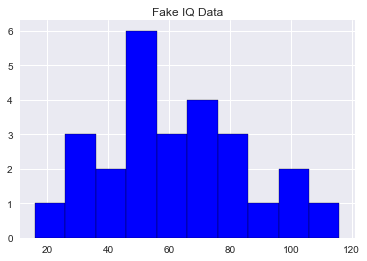

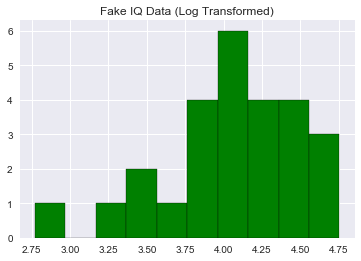

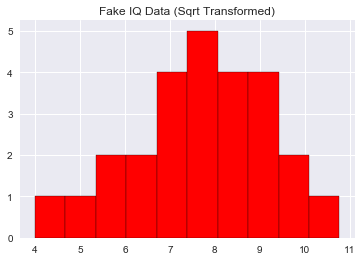

In [122]:
# Histogram with density plot

import seaborn as sns
import matplotlib.mlab as mlab
%matplotlib inline



fake_data=[30,40,62,61,85,80,16,55,26,53,51,70,116,
           66,51,101,99,88,71,55,51,35,62,71,81,44]


plt.hist(fake_data, color = 'blue', edgecolor = 'black')
plt.title('Fake IQ Data')
plt.subplots()

plt.hist(np.log(fake_data), color = 'green', edgecolor = 'black')
plt.title('Fake IQ Data (Log Transformed)')
plt.subplots()

plt.hist(np.sqrt(fake_data), color = 'red', edgecolor = 'black')
plt.title('Fake IQ Data (Sqrt Transformed)')
# plt.subplot()
# plt.hist(np.log(fake_data), color = 'green', edgecolor = 'black')
# plt.title('Fake IQ Data (Log Transformed)')

# Lets look at this a little more clearly:

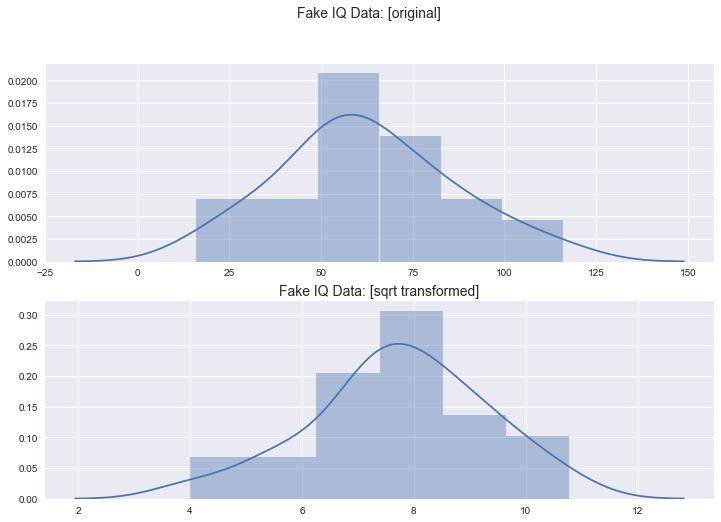

In [296]:
fig, axarr = plt.subplots(2, 1, figsize=(12, 8))


sns.distplot(fake_data,ax=axarr[0])
plt.suptitle('Fake IQ Data: [original]',size=14)

sns.distplot(np.sqrt(fake_data),ax=axarr[1])
plt.title('Fake IQ Data: [sqrt transformed]',size=14)

plt.show()

# transform data and looks close? What now?

+ `Well, lets consider that maybe we think these data reflect a normal distribution.`
    + We could do a comparison after finding the parameters and see how it matches up.
    + We also, may end up in a situation where we need to reconsider our distribution as well. (*which is*) very likely in the real world. 
    
**`For simplicity we are assuming Normal distribution`**:

<font size=4>$f(x_1,x_2,x_3...x_n ; \mu,\sigma) = $</font>

**`Replace with distribution:`**

<font size=4>$P(X;\mu,\sigma)= \frac{1}{\sigma \sqrt(2\pi)} exp(-\frac{(x-\mu)^2}{2\sigma^2}) =$</font>

<font size=4>$\prod  \frac{1}{\sigma \sqrt(2\pi)} exp(-\frac{(x-\mu)^2}{2\sigma^2}) =$</font>


**`Expand:`**

<font size=3>$ \frac{1}{\sigma \sqrt(2\pi)} exp(-\frac{(x_1-\mu)^2}{2\sigma^2})* \frac{1}{\sigma \sqrt(2\pi)} exp(-\frac{(x_2-\mu)^2}{2\sigma^2})* \frac{1}{\sigma \sqrt(2\pi)} exp(-\frac{(x_3-\mu)^2}{2\sigma^2})*... \frac{1}{\sigma \sqrt(2\pi)} exp(-\frac{(x_n-\mu)^2}{2\sigma^2}) =$</font>


**`Now take the Log:`**

<font size=2.8>$ln(L(\theta;X))=ln(\frac{1}{\sigma \sqrt(2\pi)} exp(-\frac{(x_1-\mu)^2}{2\sigma^2}))+ ln(\frac{1}{\sigma \sqrt(2\pi)} exp(-\frac{(x_2-\mu)^2}{2\sigma^2}))+ ln(\frac{1}{\sigma \sqrt(2\pi)} exp(-\frac{(x_3-\mu)^2}{2\sigma^2}))+... ln(\frac{1}{\sigma \sqrt(2\pi)} exp (-\frac{(x_n-\mu)^2}{2\sigma^2}))$</font>


**`Simplify`:**

<font size=3>$ln(L(\theta;X))=ln(\frac{1}{\sigma \sqrt(2\pi)})+ln(exp(-\frac{(x_1-\mu)^2}{2\sigma^2})$</font>, this is done for each x_i so I will simplify:

<font size=4>$=\frac{-1}{2}ln(2\sigma\pi)-\frac{(x_1-\mu)^2}{2\sigma^2}$</font>

<font size=4>$=\frac{-1}{2}ln(2\pi)-\frac{1}{2}ln(\sigma)-\frac{(x_1-\mu)^2}{2\sigma^2}$</font>, Now repeat for a X=[x_1,x_2...x_n]

To speed this up and understand that we have: (n) observations (data points)

<font size=4>$=\frac{-n}{2}ln(2\pi)-n*ln(\sigma)-\frac{1}{2\sigma^2}\sum_{i=1}^n(x_i-\mu)^2$</font> *`This is what we will take the derivative of`*


**`Now the Derivatives`:**

The first derivative will be the slope of the log-likelihood curve:

<font size=4>$\frac{\partial L}{\partial \mu}=0-0-\frac{1}{2\sigma^2}\sum_{i=1}^n(x_i-\mu)^2=$</font>

<font size=4>$\frac{1}{\sigma^2}\sum_{i=1}^{n} x_i-\mu=$</font>

<font size=4>$\frac{1}{\sigma^2}\sum_{i=1}^{n} x_i-n\mu$</font>

<font size=4>$\hat\mu=\frac{\sum_{i=1}^{n} x_i}{n} = $</font>sample mean


`---------Now Standard Deviation-----------`

short cut:


<font size=4>$=\frac{-n}{2}ln(2\pi)-n*ln(\sigma)-\frac{1}{2\sigma^2}\sum_{i=1}^n(x_i-\mu)^2$</font>

<font size=4>$\frac{\partial L}{\partial \sigma}=0-\frac{n}{\sigma}+\frac{1}{\sigma^3}\sum_{i=1}^n(x_i-\mu)^2=$</font>, set equal to zero

<font size=4>$-\frac{n}{\sigma}+\frac{1}{\sigma^3}\sum_{i=1}^n(x_i-\mu)^2=0$</font>


**`Manipulate:`**

<font size=4>$\frac{1}{\sigma^3}\sum_{i=1}^n(x_i-\mu)^2=\frac{n}{\sigma}$</font>


<font size=4.9>$\hat\sigma=\sqrt\frac{\sum_{i=1}^n(x_i-\mu)^2=\frac{n}{\sigma}}{n}$</font>, biased estimator

`side note: the (n-1) will be unbiased look into proof, second webpage below`

https://machinelearningmastery.com/probability-density-estimation/

https://daijiang.name/en/2014/10/08/mle-normal-distribution/


# Check the CDF: so we can get an idea of if these data will fit a Normal Distr

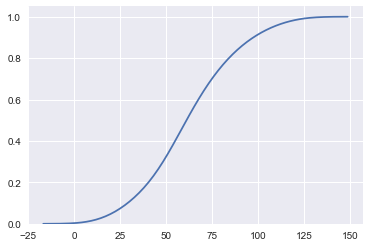

In [511]:
kwargs = {'cumulative': True}
# sns.distplot(fake_data, hist_kws=kwargs, kde_kws=kwargs)
sns.kdeplot(fake_data,cumulative=True)


# `We can directly compute the` $\mu$ & $\sigma$ `from the data, but this doesn't mean that we are actually representing the population the data came from.` 

+ Hence, the use of `MLE`.


62.30769230769231 23.57601328398981


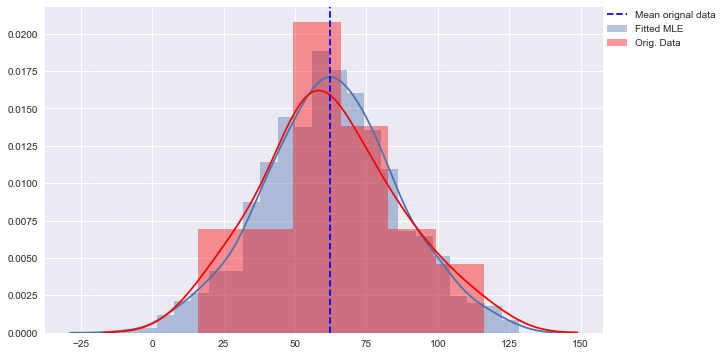

In [452]:
print(np.mean(fake_data),np.std(fake_data))
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.distplot(np.random.normal(np.mean(fake_data),np.std(fake_data),1000))
# plt.legend('MLE')
sns.distplot(fake_data,color='red')
plt.axvline(np.mean(fake_data),color='b', linestyle='--')
plt.legend(['Mean orignal data','Fitted MLE','Orig. Data'],bbox_to_anchor=(1, 1),
           loc=2, borderaxespad=0.) #,fontsize=25
plt.show()


# sigma=np.std(fake_data)
# mu=np.mean(fake_data)

# vals=[]
# for x in sorted(fake_data):
# #     norm_d=1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)^2/2*sigma^2)
#     norm_d=1/(sigma*np.sqrt(2*np.pi))*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sigma, 2.)))
#     vals.append(norm_d)
# sorted(fake_data)

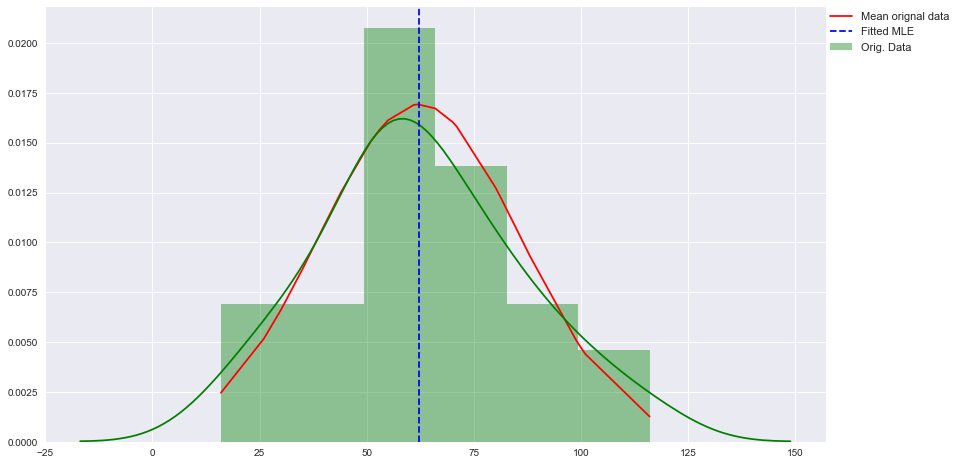

In [508]:

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import scipy.stats as stats
fig_dims = (14, 8)
fig, ax = plt.subplots(figsize=fig_dims)
meany=np.mean(fake_data)
sd_=np.std(fake_data)


pdf = stats.norm.pdf(sorted(fake_data), meany, sd_)
plt.plot(sorted(fake_data), pdf,color='red') # including h here is crucial

sns.distplot(fake_data,color='green')
plt.axvline(np.mean(fake_data),color='b', linestyle='--')

plt.legend(['Mean orignal data','Fitted MLE','Orig. Data'],bbox_to_anchor=(1, 1),
           loc=2, borderaxespad=0.,fontsize=11)
plt.show()

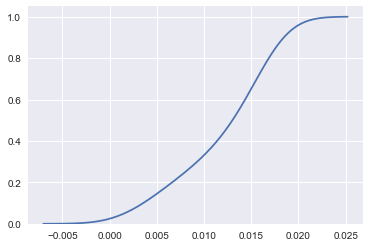

In [513]:
sns.kdeplot(pdf,cumulative=True)
plt.show()

# Last Thoughts: 

+ You can't always, assume your data will fit an exact model
+ Approximation methods are usually a good call on real data
+ Do not blindly, believe everything you hear!

`--------------------`

# <font color=red>SHARE</font>, Share & 

# <font color=red>SUB</font>scribe

# Citations & Help:

# ◔̯◔

https://www.itl.nist.gov/div898/handbook/apr/section4/apr412.htm

https://en.wikipedia.org/wiki/Maximum_likelihood_estimation

https://towardsdatascience.com/probability-concepts-explained-maximum-likelihood-estimation-c7b4342fdbb1

https://machinelearningmastery.com/what-is-maximum-likelihood-estimation-in-machine-learning/

https://www.sciencedirect.com/topics/engineering/maximum-likelihood-estimation

https://www.math.arizona.edu/~jwatkins/n-mle.pdf (math background)

https://medium.com/@rrfd/what-is-maximum-likelihood-estimation-examples-in-python-791153818030

https://python.quantecon.org/mle.html (python example)

http://times.cs.uiuc.edu/course/410/note/mle.pdf (good paper)

https://emredjan.github.io/blog/2017/07/19/plotting-distributions/?source=post_page-----c5ebaafdeedd----------------------

https://www2.math.ethz.ch/education/bachelor/lectures/fs2016/math/wr_s/solution_11.pdf (great read)

https://psu-psychology.github.io/psy-597-SEM/04_latent_variables_estimation/maximum_likelihood.html

http://web.vu.lt/mif/a.buteikis/wp-content/uploads/PE_Book/3-4-UnivarMLE.html

https://stackoverflow.com/questions/53128352/legend-overlapping-plot-area-in-seaborn

https://people.missouristate.edu/songfengzheng/Teaching/MTH541/Lecture%20notes/MLE.pdf

https://www.youtube.com/watch?v=ttmKa1DovfI
 
https://moonbooks.org/Articles/How-to-calculate-a-log-likelihood-in-python-example-with-a-normal-distribution-/
 
https://stackoverflow.com/questions/20011494/plot-normal-distribution-with-matplotlib/20026448
 
https://stackoverflow.com/questions/53128352/legend-overlapping-plot-area-in-seaborn

https://stackoverflow.com/questions/51417483/mean-median-mode-lines-showing-only-in-last-graph-in-seaborn

http://web.vu.lt/mif/a.buteikis/wp-content/uploads/PE_Book/3-4-UnivarMLE.html